In [1]:
import pandas as pd

births= pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [2]:
births['decade']= 10 * (births['year'] // 10)
births.pivot_table('births', index= 'decade', columns= 'gender', aggfunc= 'sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total birth per year')

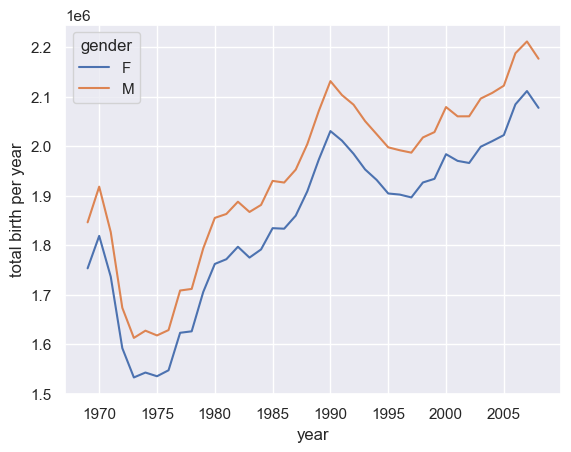

In [5]:
#연대마다 항상 남성의 출생률 > 여성의 출생률
#결과를 플로팅
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
sns.set() #Seaborn 스타일 사용
births.pivot_table('births', index= 'year', columns= 'gender', aggfunc= 'sum').plot()
plt.ylabel('total birth per year')

Text(0, 0.5, 'total birth per decade')

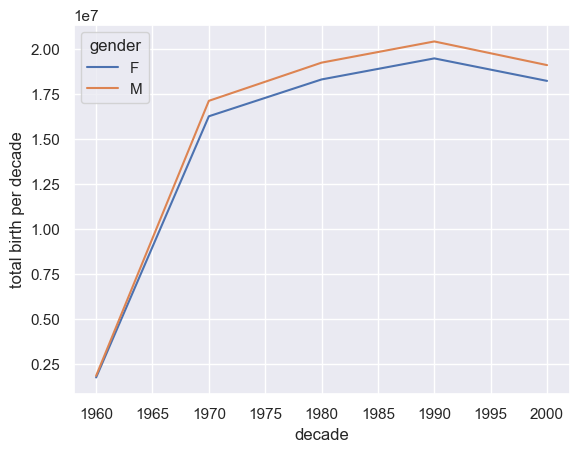

In [6]:
sns.set() #Seaborn 스타일 사용
births.pivot_table('births', index= 'decade', columns= 'gender', aggfunc= 'sum').plot()
plt.ylabel('total birth per decade')

In [8]:
#이상치 제거 
#시그마 클리핑 연산 -> 사분위수
import numpy as np

quartiles= np.percentile(births['births'], [25, 50, 75])
mu= quartiles[1]
sig= 0.74 * (quartiles[2] - quartiles[0]) #0.74: 가우스 분포의 사분위 수

In [9]:
#이상치 제거
births= births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [10]:
#'day'열을 정수형으로 설정; 원래는 널 값 때문에 문자열이었음
births['day']= births['day'].astype(int)

In [15]:
#year, month, day로부터 날짜 인덱스 생성
births.index= pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format= '%Y%m%d')
births['dayofweek']= births.index.dayofweek #dayofweek: 각 해당 날짜의 요일

In [16]:
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


C:\Users\user\AppData\Local\Temp\ipykernel_8476\2798493171.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


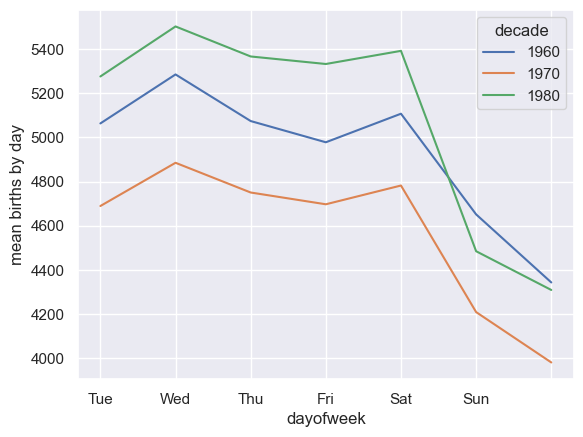

In [17]:
#요일별 출생 수
import matplotlib as mpl

births.pivot_table('births', index= 'dayofweek', columns= 'decade', aggfunc= 'mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [18]:
#주중보다 주말에 출생 수가 적다

### 연도 내 일별 평균 출생 수를 그래프로 나타내보자

In [20]:
births_by_date= births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [24]:
#연월일의 날짜로 변환
births_by_date.index= [pd.Timestamp(year=2012, month=index.month, day=index.day) for index in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


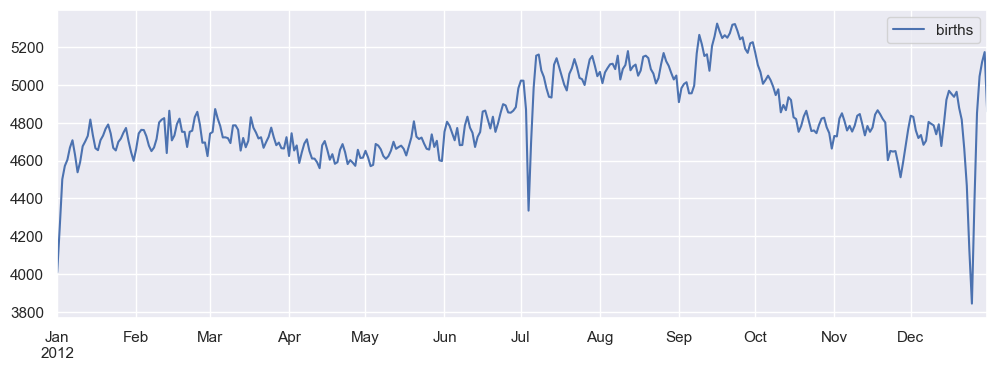

In [25]:
fig, ax= plt.subplots(figsize= (12, 4))
births_by_date.plot(ax=ax);

In [26]:
#미국의 휴일에 출생률이 급감 -> 예정 분만 및 유도 분만을 선호했던 경향이 반영